In [14]:
# Initial imports
import os 
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt
import hvplot.pandas
from yahoofinancials import YahooFinancials
from pandas_datareader import data as pdr
import plotly.graph_objs as go
import plotly.express as px

%matplotlib inline

In [15]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [27]:
start_sp = datetime.datetime(2014, 10, 1)
end_sp = datetime.datetime(2019, 10, 1)

In [28]:
# Set file path to csv and use file path to read CSV into a DataFrame and displaying a few rows
spy_csv = Path("CsvFiles/SPY.csv")
vgt_csv= Path("CsvFiles/VGT1.csv")
# set file path to read CSV into a DataFrame
spy = pd.read_csv(spy_csv)
vgt = pd.read_csv(vgt_csv)
#US Dollar/USDX - Index
TNX_df_five = pdr.get_data_yahoo('TNX', start_sp, end_sp)
TNX_df = pdr.get_data_yahoo('TNX', start_sp, end_sp)

In [29]:
TNX_df_five.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close'], inplace=True)
TNX_df_five.head()

,Close
Date,
2019-04-22,1.23
2019-04-23,1.19
2019-04-24,1.19
2019-04-25,1.15
2019-04-26,1.15


In [32]:
print(spy.head())
print(vgt.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-10-11  277.079987  278.899994  270.359985  272.170013  258.167450   
1  2018-10-12  276.769989  277.089996  272.369995  275.950012  261.752930   
2  2018-10-15  275.549988  277.040009  274.299988  274.399994  260.282654   
3  2018-10-16  276.600006  280.820007  276.070007  280.399994  265.973999   
4  2018-10-17  280.440002  281.149994  277.559998  280.450012  266.021454   

      Volume  
0  274840500  
1  183186500  
2  102263700  
3  118255800  
4  110626000  
         Date        Open        High         Low       Close   Adj Close  \
0  2018-01-02  165.479996  167.000000  165.100006  166.979996  160.373138   
1  2018-01-03  167.309998  168.910004  167.300003  168.720001  162.044266   
2  2018-01-04  169.509995  170.160004  169.229996  169.690002  162.975861   
3  2018-01-05  170.570007  171.630005  170.229996  171.500000  164.714249   
4  2018-01-08  171.600006  172.500000  171.300003  172.320007 

In [19]:
# Make a data frame containing VGT and XLF close price
close_df = pd.DataFrame()
close_df["Date"] = spy["Date"]
close_df["SPY"] = spy["Close"]
close_df["VGT"] = vgt["Close"]
close
close_df = close_df.set_index(pd.DatetimeIndex(close_df["Date"].values))
close_df.head()

,Date,SPY,VGT
2018-10-11,2018-10-11,272.170013,166.979996
2018-10-12,2018-10-12,275.950012,168.720001
2018-10-15,2018-10-15,274.399994,169.690002
2018-10-16,2018-10-16,280.399994,171.500000
2018-10-17,2018-10-17,280.450012,172.320007


NameError: name 'TNX_df_five' is not defined

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


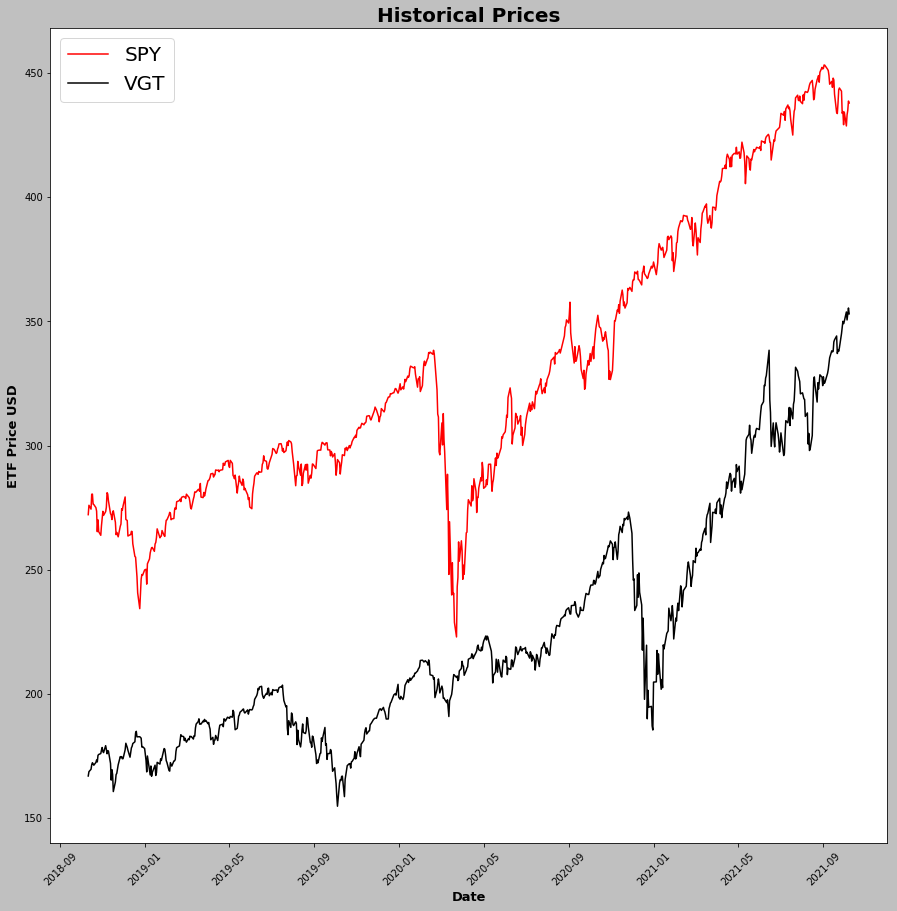

In [20]:
# Plot the data
plt.figure(figsize=(15,15),facecolor='silver')
plt.plot(close_df.index, close_df["SPY"], label="SPY", color="red")
plt.plot(close_df.index, close_df["VGT"], label="VGT", color="black")
plt.xlabel("Date",fontweight="bold",size=13)
plt.ylabel("ETF Price USD",fontweight="bold",size=13)
plt.legend(prop={"size":20})
plt.title("Historical Prices",fontweight="bold",size=20)
plt.xticks(rotation=45)
plt.show()

,Close
Date,
2014-10-01,85.970001
2014-10-02,85.599998
2014-10-03,86.690002
2014-10-06,85.709999
2014-10-07,85.669998


In [35]:
close_df.hvplot()

:Curve   [index]   (volatility)

In [36]:
close_df.hvplot.line(xlabel="Year", ylabel="Daily Return",title="")

:Curve   [index]   (volatility)

In [38]:
close_df = pd.DataFrame(
    {
        "ticker": ["XLF", "VGT"],
        "volatility": (18.5, 30.8)
    }
)

In [ ]:
close_df.hvplot.bar(
    x='ticker', y='volatility', xlabel='Ticker', ylabel='Volatility'
)